In [50]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [51]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import preprocessing 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [53]:
df.drop('ID', axis=1, inplace=True)
df.drop('ZIP Code', axis=1, inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [55]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [58]:
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [60]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


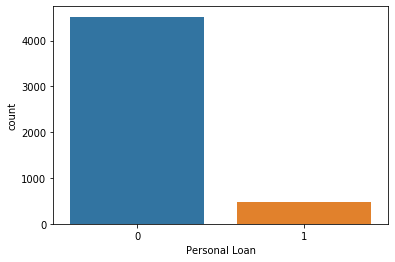

In [61]:
sns.countplot(x="Personal Loan", data=df) 
#the data set is skewed in terms of target column.
#There are far few records in class 1 i.e. people who took the personal loan last time.

In [62]:
#Let us build some contigency tables
def get_ct(df,var):
    ct_res=pd.crosstab(df[var],df['Personal Loan'],margins=True)
    ct_res['Approved(%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [64]:
get_ct(df,'CreditCard')

Personal Loan,0,1,Approved(%)
CreditCard,,,
0,3193,337,9.55
1,1327,143,9.73
All,4520,480,9.60


In [12]:
get_ct(df,'Online')

Personal Loan,0,1,Approved(%)
Online,,,
0,1827,189,9.38
1,2693,291,9.75
All,4520,480,9.60


In [13]:
get_ct(df,'Education')

Personal Loan,0,1,Approved(%)
Education,,,
1,2003,93,4.44
2,1221,182,12.97
3,1296,205,13.66
All,4520,480,9.60


In [14]:
get_ct(df,'Family')

Personal Loan,0,1,Approved(%)
Family,,,
1,1365,107,7.27
2,1190,106,8.18
3,877,133,13.17
4,1088,134,10.97
All,4520,480,9.60


In [15]:
get_ct(df,'CD Account')

Personal Loan,0,1,Approved(%)
CD Account,,,
0,4358,340,7.24
1,162,140,46.36
All,4520,480,9.60


In [65]:
def get_stra_ct(df,stra_var,var):
    ct_res=pd.crosstab(index=[df[stra_var],df[var]], columns=df['Personal Loan'],margins=True)
    ct_res['Approved(%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All').drop('All',level=0)
get_stra_ct(df,'Online','Family')

Personal Loan    0   1  Approved(%)
Online Family                      
0      1       550  39         6.62
       2       506  42         7.66
       3       348  51        12.78
       4       423  57        11.88
1      1       815  68         7.70
       2       684  64         8.56
       3       529  82        13.42
       4       665  77        10.38

In [66]:
get_stra_ct(df,'CreditCard', 'Education')

Personal Loan            0    1  Approved(%)
CreditCard Education                        
0          1          1402   61         4.17
           2           873  130        12.96
           3           918  146        13.72
1          1           601   32         5.06
           2           348   52        13.00
           3           378   59        13.50

In [18]:
# Column descriptions

##	Data Description:								
##									
##	ID	Customer ID							
##	Age	Customer's age in completed years							
##	Experience	#years of professional experience							
##	Income	Annual income of the customer ($000)							
##	ZIPCode	Home Address ZIP code.							
##	Family	Family size of the customer							
##	CCAvg	Avg. spending on credit cards per month ($000)							
##	Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
##	Mortgage	Value of house mortgage if any. ($000)							
##	Personal Loan	Did this customer accept the personal loan offered in the last campaign?							
##	Securities Account	Does the customer have a securities account with the bank?							
##	CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
##	Online	Does the customer use internet banking facilities?							
##	CreditCard	Does the customer use a credit card issued by UniversalBank?							


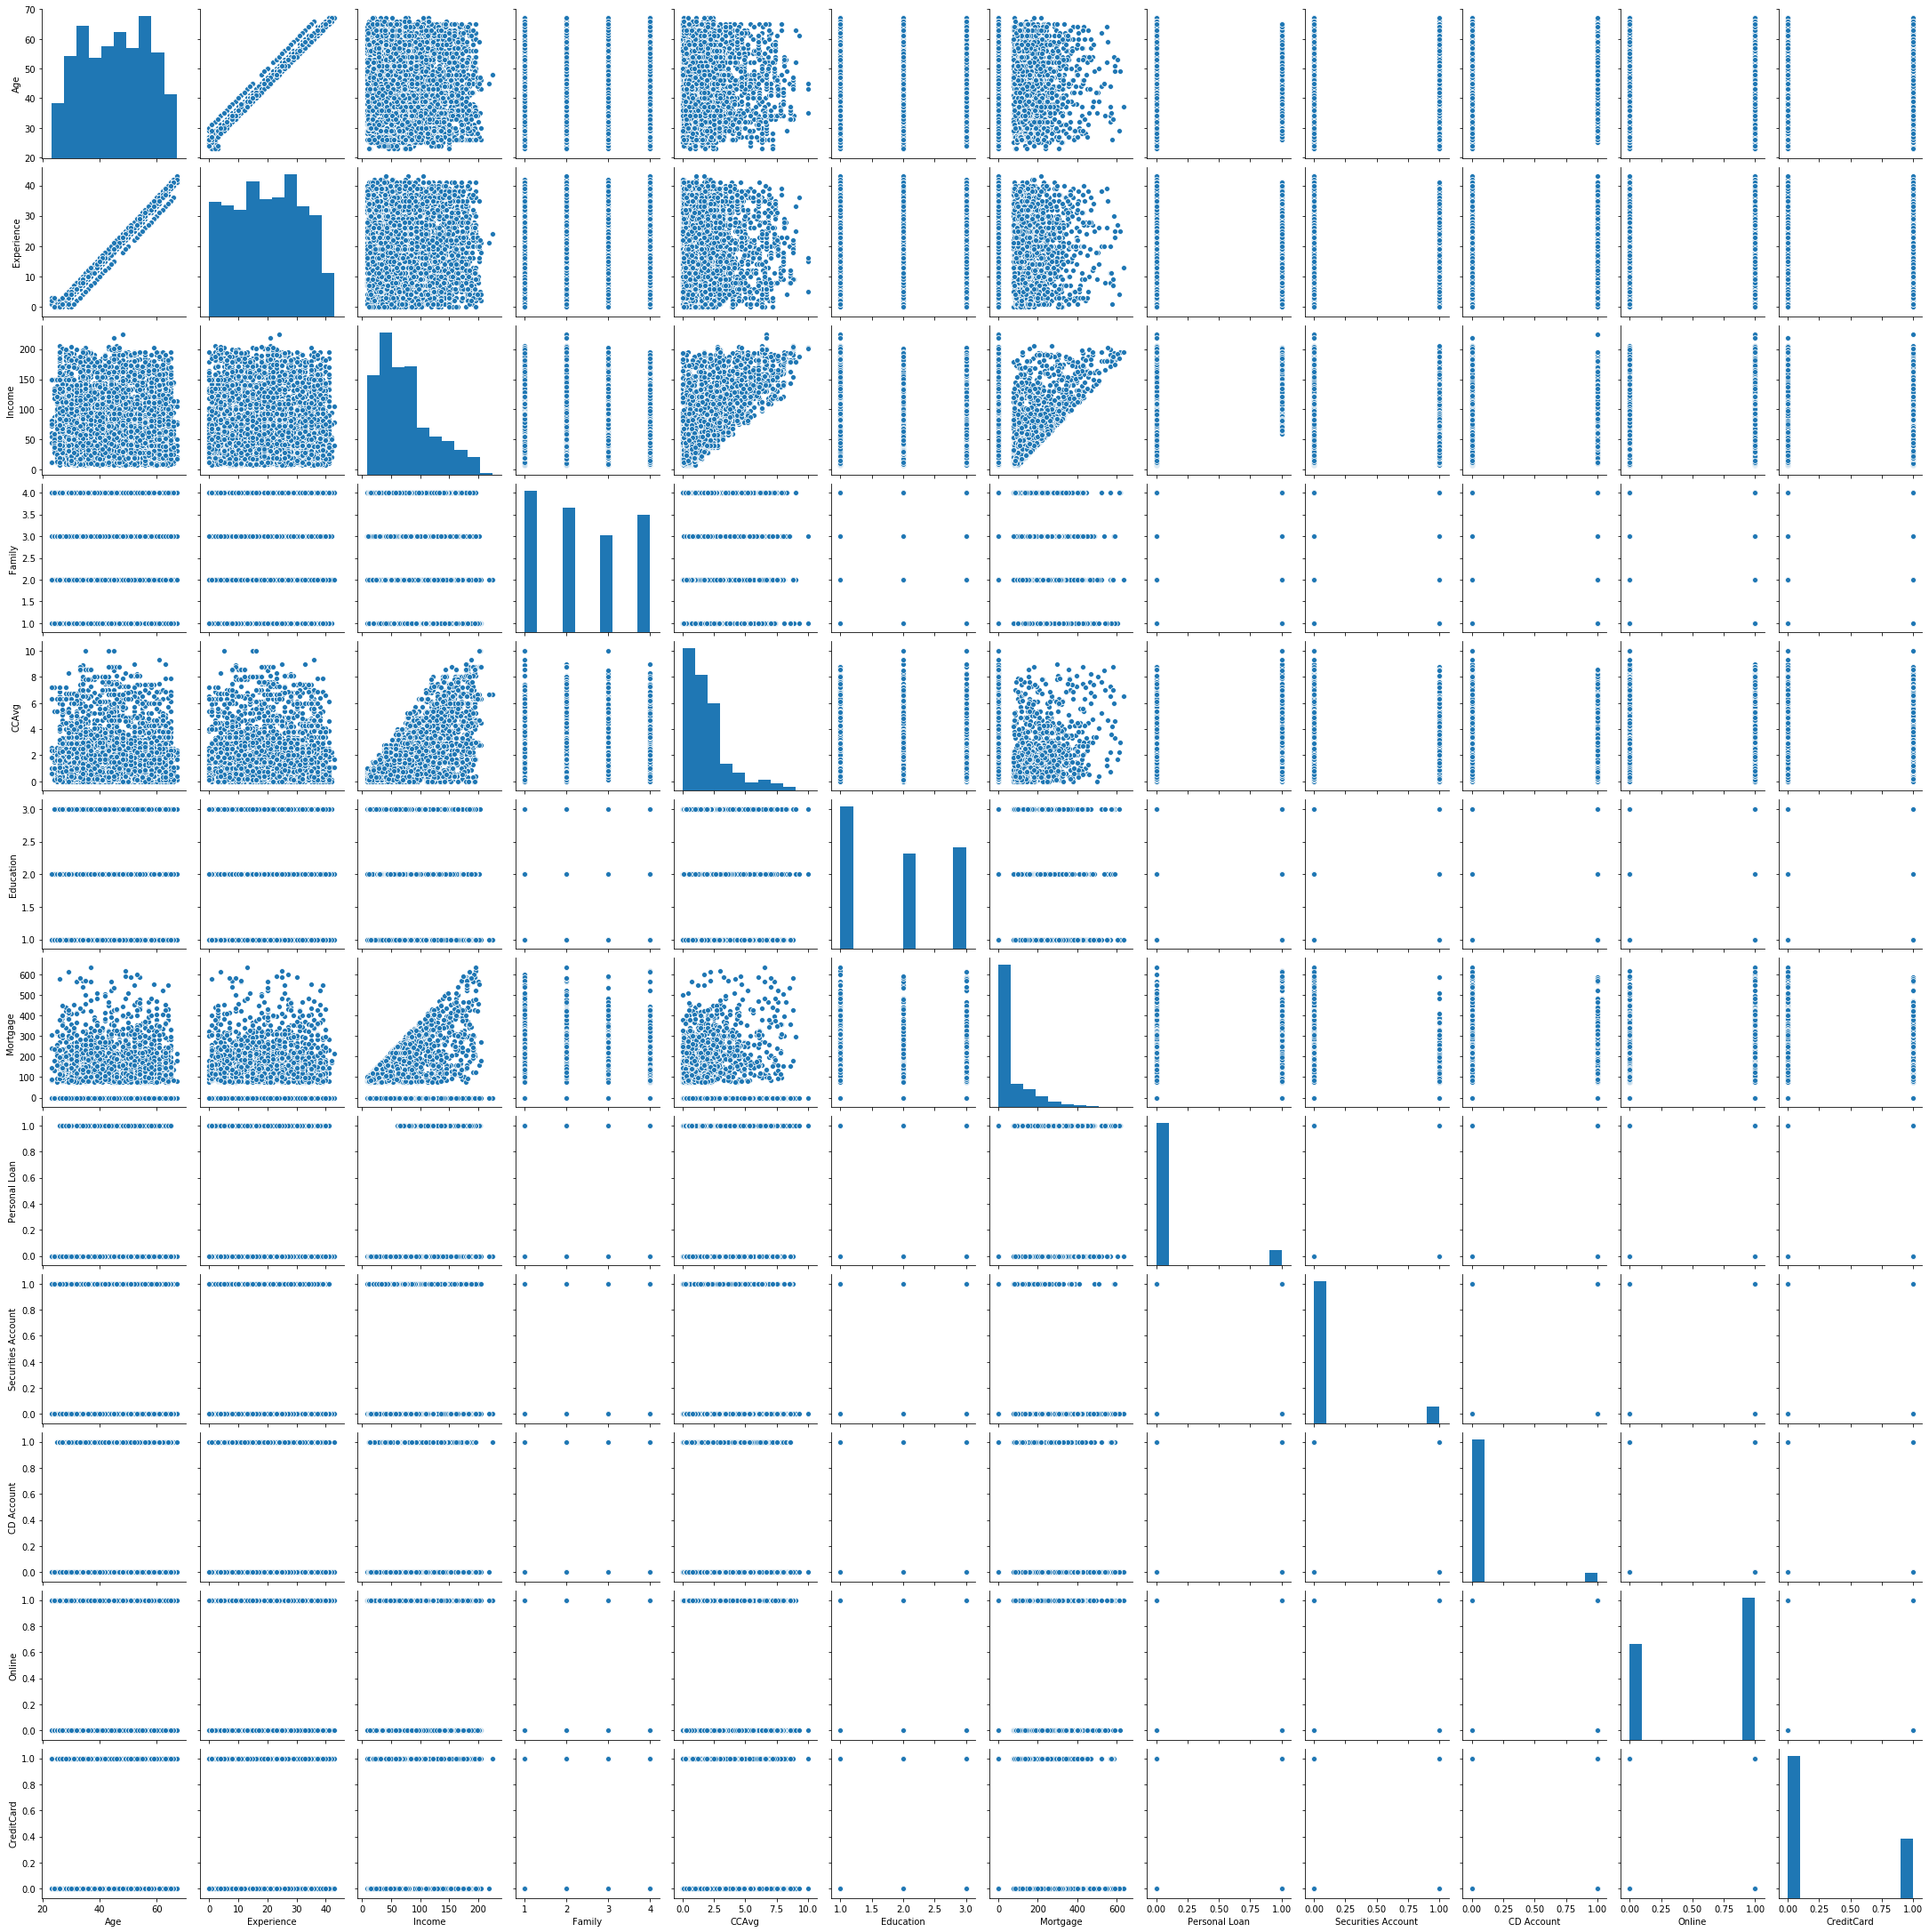

In [67]:
#importing seaborn for statistical plots
import seaborn as sns
df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited

sns.pairplot(df_attr)

In [69]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship


In [70]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [71]:
df.groupby(["Personal Loan"]).count()  #The data set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed. 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


In [72]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']


In [73]:
X_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0


In [74]:
x_train, x_test, y_train, y_test=model_selection.train_test_split(X_df,y_df,test_size=0.30)
import statsmodels.api as sm
logit=sm.Logit(y_train,sm.add_constant(x_train))
lg=logit.fit()

#summary of logistic regression
from scipy import stats
stats.chisqprob=lambda chisq, df:stats.chi2.sf(chisq,df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.137250
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Sat, 17 Oct 2020   Pseudo R-squ.:                  0.5686
Time:                        12:37:24   Log-Likelihood:                -480.37
converged:                       True   LL-Null:                       -1113.4
Covariance Type:            nonrobust   LLR p-value:                9.107e-265
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.4415      1.871     -6.648      0.000     -16.109      -8.774
Age  

In [26]:
####### --------------------------- Logistic Model --------------------------------------

In [75]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values


test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)


In [76]:
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array
y_test = np.ravel(y_test)   # to convert 1 d vector into 1 d array

In [78]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)
model_score = log_model.score(X_test, y_test)
y_predict = log_model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))


0.9515
[[1791   25]
 [  72  112]]


C:\Users\Pius\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1816
           1       0.82      0.61      0.70       184

    accuracy                           0.95      2000
   macro avg       0.89      0.80      0.84      2000
weighted avg       0.95      0.95      0.95      2000



In [31]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

In [32]:
###### ----------------------- Naive Bayes Model ---------------------------------

In [80]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

predictions=nb_model.predict(X_test)

#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,predictions))


[[1652  164]
 [  81  103]]


In [82]:
# make predictions
expected = y_test
predicted = nb_model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1816
           1       0.39      0.56      0.46       184

    accuracy                           0.88      2000
   macro avg       0.67      0.73      0.69      2000
weighted avg       0.90      0.88      0.89      2000



In [83]:
## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try
## K Nearest Neighbours

In [84]:
#####  ------------------------------ K Nearest Neighbours ------------------------------------

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [86]:
predicted_labels = knn_model.predict(X_test)

In [87]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1752   64]
 [ 102   82]]


In [88]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1816
           1       0.56      0.45      0.50       184

    accuracy                           0.92      2000
   macro avg       0.75      0.71      0.73      2000
weighted avg       0.91      0.92      0.91      2000



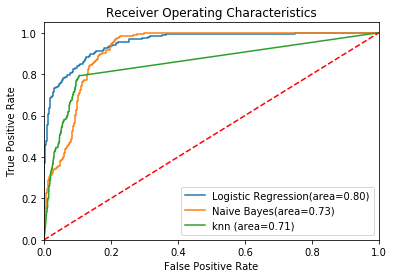

In [89]:


plt.figure()
logit_roc_auc=roc_auc_score(y_test,log_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)


nb_roc_auc=roc_auc_score(y_test,nb_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Naive Bayes(area=%0.2f)'% nb_roc_auc)

knn_roc_auc=roc_auc_score(y_test,knn_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,knn_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='knn (area=%0.2f)'% knn_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()

In [90]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [91]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [94]:
predicted_labels =knn_model.predict(X_test_scaled)

In [95]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1797   19]
 [  62  122]]


In [96]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1816
           1       0.87      0.66      0.75       184

    accuracy                           0.96      2000
   macro avg       0.92      0.83      0.86      2000
weighted avg       0.96      0.96      0.96      2000



In [97]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

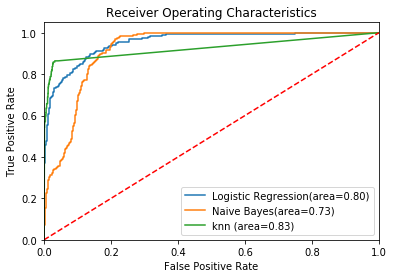

In [98]:

plt.figure()
logit_roc_auc=roc_auc_score(y_test,log_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'% logit_roc_auc)


nb_roc_auc=roc_auc_score(y_test,nb_model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,nb_model.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Naive Bayes(area=%0.2f)'% nb_roc_auc)

knn_roc_auc=roc_auc_score(y_test,knn_model.predict(X_test_scaled))
fpr,tpr,thresholds=roc_curve(y_test,knn_model.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr,tpr,label='knn (area=%0.2f)'% knn_roc_auc)

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc="lower right")
#plt.savefig('ROC')
plt.show()